In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop('User ID', axis = 1, inplace = True)

In [5]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
df_sex = pd.get_dummies(df['Gender'], drop_first=True)

In [7]:
df_sex.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [8]:
df = pd.concat([df_sex,df], axis = 1)

In [9]:
df.head()

,Male,Gender,Age,EstimatedSalary,Purchased
0,1,Male,19,19000,0
1,1,Male,35,20000,0
2,0,Female,26,43000,0
3,0,Female,27,57000,0
4,1,Male,19,76000,0


In [10]:
df.drop('Gender', axis = 1, inplace =True)

In [11]:
df.head()

,Male,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [12]:
df.corr()

,Male,Age,EstimatedSalary,Purchased
Male,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


In [13]:
import seaborn as sns

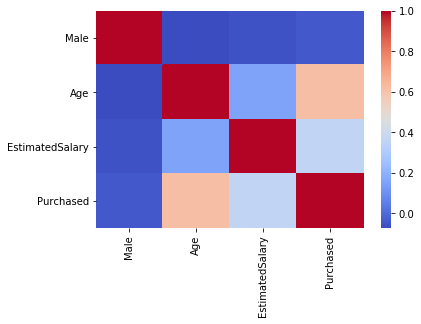

In [14]:
sns.heatmap(df.corr(), cmap = 'coolwarm')

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
ss = StandardScaler()

In [17]:
scaled_array = ss.fit_transform(df.drop('Purchased',axis = 1))

In [18]:
scaled_array

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [19]:
df.columns

Index(['Male', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [20]:
x = pd.DataFrame(data = scaled_array, columns=df.columns[:-1])

In [22]:
y = df['Purchased']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [26]:
x_train.shape

(280, 3)

In [27]:
y_train.shape

(280,)

In [28]:
x_test.shape

(120, 3)

In [29]:
y_test.shape

(120,)

In [30]:
from sklearn.svm import SVC

In [31]:
model = SVC()

In [32]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
ypred = model.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm = confusion_matrix(y_test, ypred)

In [36]:
cm

array([[67,  9],
       [ 6, 38]], dtype=int64)

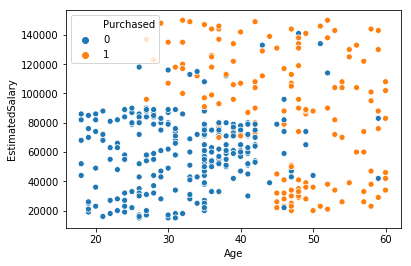

In [37]:
sns.scatterplot(x = 'Age', y = 'EstimatedSalary', hue = 'Purchased', data = df)